# Simulation Results
Initially I ran the simulation experiments because I expected that my model training issues were due to noise in the data. However, I found that when using linearly separable simulated data, the models still failed to train. I fixed the models by clipping their gradients and correcting a few bugs, and ran them on the simulated data to see if they work. These are the results:

In [1]:
import collections
import glob
import json
import os

import numpy as np
import pandas as pd
from plotnine import *

from saged.utils import parse_map_file, split_sample_names, create_dataset_stat_df

## Sepsis classification

In [2]:
in_files = glob.glob('../../results/simulation_clipped.sepsis*.tsv')
in_files = [file for file in in_files if 'be_corrected' not in file]
print(in_files[:5])

['../../results/simulation_clipped.sepsis.deep_net.1.tsv', '../../results/simulation_clipped.sepsis.logistic_regression.1.tsv', '../../results/simulation_clipped.sepsis.pytorch_supervised.2.tsv', '../../results/simulation_clipped.sepsis.deep_net.2.tsv', '../../results/simulation_clipped.sepsis.pytorch_supervised.0.tsv']


In [3]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
    
    new_df['seed'] = model_info[-1]
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics['train_count'] = sepsis_metrics['train sample count']

sepsis_metrics['supervised'] = sepsis_metrics['supervised'].str.replace('pytorch_supervised', 'three_layer_net')
sepsis_metrics

,accuracy,balanced_accuracy,f1_score,train studies,train samples,val samples,train sample count,fraction of data used,supervised,seed,train_count
0,1.0000,1.000000,1.000000,"Experiment_healthy_515,Experiment_sepsis_124,E...","healthy_956,healthy_565,sepsis_873,sepsis_234,...","healthy_5,healthy_13,healthy_15,healthy_30,hea...",156,0.1,deep_net,1,156
1,1.0000,1.000000,1.000000,"Experiment_sepsis_492,Experiment_sepsis_332,Ex...","healthy_956,healthy_565,sepsis_873,sepsis_234,...","healthy_5,healthy_13,healthy_15,healthy_30,hea...",312,0.2,deep_net,1,312
2,0.7775,0.772959,0.820926,"Experiment_sepsis_492,Experiment_sepsis_332,Ex...","healthy_956,healthy_565,sepsis_873,sepsis_234,...","healthy_5,healthy_13,healthy_15,healthy_30,hea...",468,0.3,deep_net,1,468
3,1.0000,1.000000,1.000000,"Experiment_sepsis_492,Experiment_sepsis_332,Ex...","healthy_956,healthy_565,sepsis_873,sepsis_234,...","healthy_5,healthy_13,healthy_15,healthy_30,hea...",624,0.4,deep_net,1,624
4,1.0000,1.000000,1.000000,"Experiment_sepsis_492,Experiment_sepsis_332,Ex...","healthy_956,healthy_565,sepsis_873,sepsis_234,...","healthy_5,healthy_13,healthy_15,healthy_30,hea...",780,0.5,deep_net,1,780
...,...,...,...,...,...,...,...,...,...,...,...
45,0.9925,0.992925,0.992874,"Experiment_sepsis_192,Experiment_sepsis_676,Ex...","sepsis_993,sepsis_937,sepsis_413,sepsis_353,se...","healthy_0,healthy_4,healthy_9,healthy_10,healt...",891,0.6,three_layer_net,1,891
46,0.9925,0.992925,0.992874,"Experiment_sepsis_192,Experiment_sepsis_676,Ex...","sepsis_993,sepsis_937,sepsis_413,sepsis_353,se...","healthy_0,healthy_4,healthy_9,healthy_10,healt...",1040,0.7,three_layer_net,1,1040
47,1.0000,1.000000,1.000000,"Experiment_sepsis_192,Experiment_sepsis_676,Ex...","sepsis_993,sepsis_937,sepsis_413,sepsis_353,se...","healthy_0,healthy_4,healthy_9,healthy_10,healt...",1188,0.8,three_layer_net,1,1188
48,1.0000,1.000000,1.000000,"Experiment_healthy_462,Experiment_healthy_62,E...","sepsis_993,sepsis_937,sepsis_413,sepsis_353,se...","healthy_0,healthy_4,healthy_9,healthy_10,healt...",1337,0.9,three_layer_net,1,1337


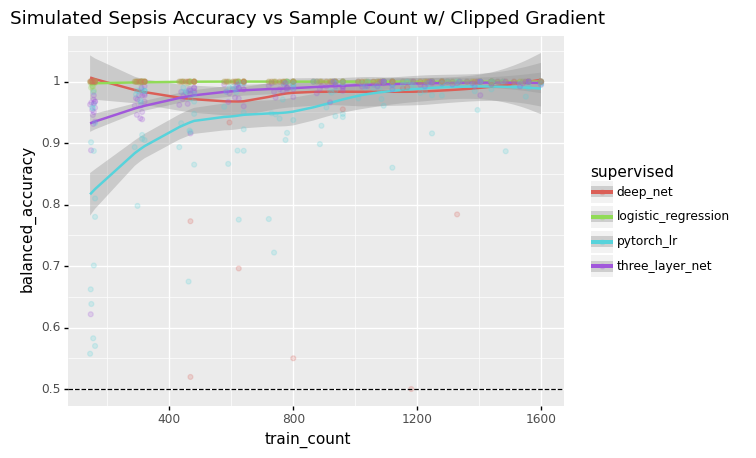

<ggplot: (8762081907617)>

In [4]:
plot = ggplot(sepsis_metrics, aes(x='train_count', y='balanced_accuracy', color='supervised')) 
plot += geom_smooth()
plot += geom_point(alpha=.2)
plot += geom_hline(yintercept=.5, linetype='dashed')
plot += ggtitle('Simulated Sepsis Accuracy vs Sample Count w/ Clipped Gradient')
plot

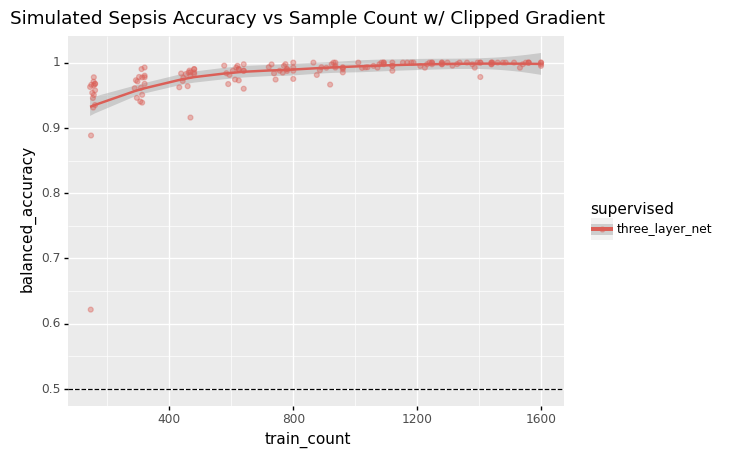

<ggplot: (8761974889365)>

In [5]:
plot = ggplot(sepsis_metrics[sepsis_metrics['supervised'] == 'three_layer_net'], aes(x='train_count', y='balanced_accuracy', color='supervised')) 
plot += geom_smooth()
plot += geom_point(alpha=.4)
plot += geom_hline(yintercept=.5, linetype='dashed')
plot += ggtitle('Simulated Sepsis Accuracy vs Sample Count w/ Clipped Gradient')
plot

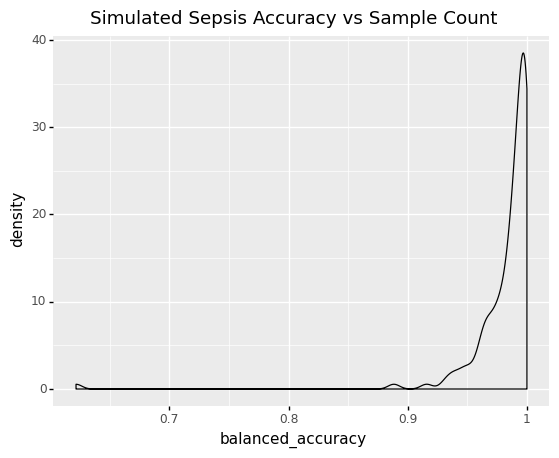

<ggplot: (8761974809853)>

In [6]:
plot = ggplot(sepsis_metrics[sepsis_metrics['supervised'] == 'three_layer_net'], aes(x='balanced_accuracy')) 
plot += geom_density()
plot += ggtitle('Simulated Sepsis Accuracy vs Sample Count')
plot

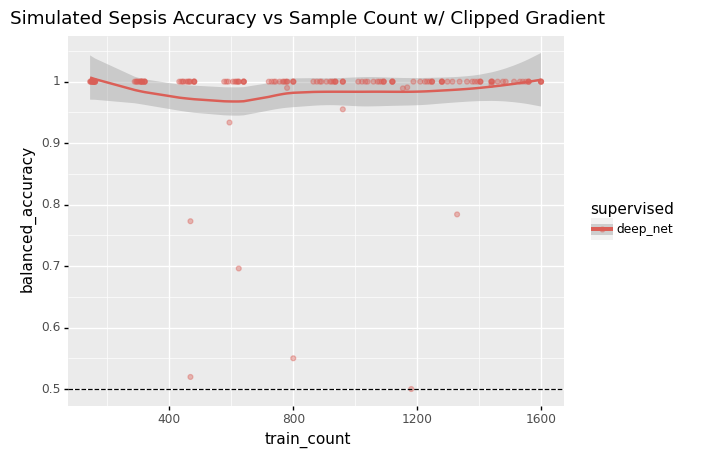

<ggplot: (8761973191277)>

In [7]:
plot = ggplot(sepsis_metrics[sepsis_metrics['supervised'] == 'deep_net'], aes(x='train_count', y='balanced_accuracy', color='supervised')) 
plot += geom_smooth()
plot += geom_point(alpha=.4)
plot += geom_hline(yintercept=.5, linetype='dashed')
plot += ggtitle('Simulated Sepsis Accuracy vs Sample Count w/ Clipped Gradient')
plot

## Simulated TB

In [8]:
in_files = glob.glob('../../results/simulation_clipped.tb*.tsv')
in_files = [file for file in in_files if 'be_corrected' not in file]
print(in_files[:5])

['../../results/simulation_clipped.tb.pytorch_lr.0.tsv', '../../results/simulation_clipped.tb.logistic_regression.2.tsv', '../../results/simulation_clipped.tb.pytorch_lr.1.tsv', '../../results/simulation_clipped.tb.deep_net.2.tsv', '../../results/simulation_clipped.tb.logistic_regression.0.tsv']


In [9]:
tb_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('tb.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
    
    new_df['seed'] = model_info[-1]
        
    tb_metrics = pd.concat([tb_metrics, new_df])
    
tb_metrics['train_count'] = tb_metrics['train sample count']

tb_metrics['supervised'] = tb_metrics['supervised'].str.replace('pytorch_supervised', 'three_layer_net')
tb_metrics

,accuracy,balanced_accuracy,f1_score,train studies,train samples,val samples,train sample count,fraction of data used,supervised,seed,train_count
0,0.9675,0.969767,0.968825,"Experiment_tb_63,Experiment_tb_192,Experiment_...","tb_650,tb_475,tb_356,tb_48,tb_400,healthy_349,...","tb_2,tb_10,tb_16,tb_18,tb_23,tb_26,tb_31,tb_36...",146,0.1,pytorch_lr,0,146
1,0.9750,0.973350,0.977169,"Experiment_tb_318,Experiment_healthy_305,Exper...","tb_650,tb_475,tb_356,tb_48,tb_400,healthy_349,...","tb_2,tb_10,tb_16,tb_18,tb_23,tb_26,tb_31,tb_36...",292,0.2,pytorch_lr,0,292
2,0.7625,0.779070,0.716418,"Experiment_tb_472,Experiment_tb_48,Experiment_...","tb_650,tb_475,tb_356,tb_48,tb_400,healthy_349,...","tb_2,tb_10,tb_16,tb_18,tb_23,tb_26,tb_31,tb_36...",438,0.3,pytorch_lr,0,438
3,0.9925,0.993023,0.992974,"Experiment_tb_472,Experiment_tb_48,Experiment_...","tb_650,tb_475,tb_356,tb_48,tb_400,healthy_349,...","tb_2,tb_10,tb_16,tb_18,tb_23,tb_26,tb_31,tb_36...",584,0.4,pytorch_lr,0,584
4,0.9975,0.997297,0.997680,"Experiment_tb_472,Experiment_tb_48,Experiment_...","tb_650,tb_475,tb_356,tb_48,tb_400,healthy_349,...","tb_2,tb_10,tb_16,tb_18,tb_23,tb_26,tb_31,tb_36...",730,0.5,pytorch_lr,0,730
...,...,...,...,...,...,...,...,...,...,...,...
45,1.0000,1.000000,1.000000,"Experiment_tb_768,Experiment_tb_56,Experiment_...","tb_993,tb_937,tb_413,tb_353,tb_922,healthy_706...","tb_0,tb_16,tb_20,tb_23,tb_24,tb_29,tb_31,tb_36...",891,0.6,logistic_regression,1,891
46,1.0000,1.000000,1.000000,"Experiment_tb_768,Experiment_tb_56,Experiment_...","tb_993,tb_937,tb_413,tb_353,tb_922,healthy_706...","tb_0,tb_16,tb_20,tb_23,tb_24,tb_29,tb_31,tb_36...",1040,0.7,logistic_regression,1,1040
47,1.0000,1.000000,1.000000,"Experiment_tb_768,Experiment_tb_56,Experiment_...","tb_993,tb_937,tb_413,tb_353,tb_922,healthy_706...","tb_0,tb_16,tb_20,tb_23,tb_24,tb_29,tb_31,tb_36...",1188,0.8,logistic_regression,1,1188
48,1.0000,1.000000,1.000000,"Experiment_tb_768,Experiment_tb_439,Experiment...","tb_993,tb_937,tb_413,tb_353,tb_922,healthy_706...","tb_0,tb_16,tb_20,tb_23,tb_24,tb_29,tb_31,tb_36...",1337,0.9,logistic_regression,1,1337


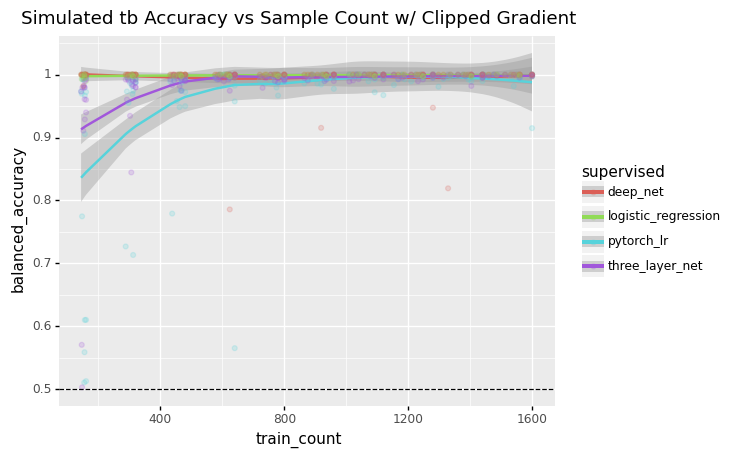

<ggplot: (8761973210301)>

In [10]:
plot = ggplot(tb_metrics, aes(x='train_count', y='balanced_accuracy', color='supervised')) 
plot += geom_smooth()
plot += geom_point(alpha=.2)
plot += geom_hline(yintercept=.5, linetype='dashed')
plot += ggtitle('Simulated tb Accuracy vs Sample Count w/ Clipped Gradient')
plot

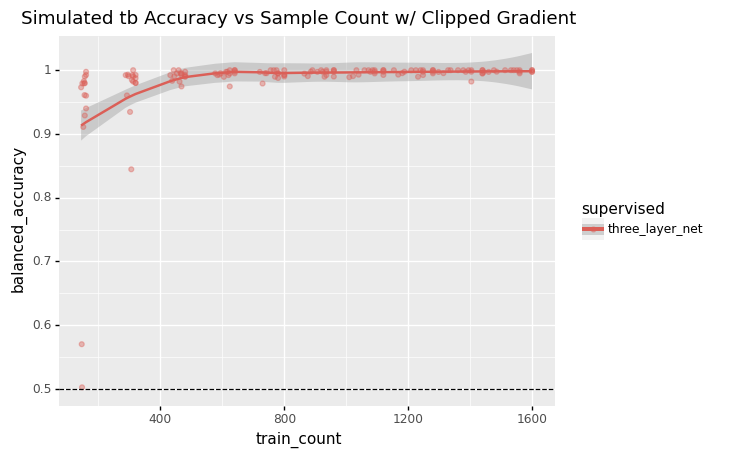

<ggplot: (8762081947073)>

In [11]:
plot = ggplot(tb_metrics[tb_metrics['supervised'] == 'three_layer_net'], aes(x='train_count', y='balanced_accuracy', color='supervised')) 
plot += geom_smooth()
plot += geom_point(alpha=.4)
plot += geom_hline(yintercept=.5, linetype='dashed')
plot += ggtitle('Simulated tb Accuracy vs Sample Count w/ Clipped Gradient')
plot

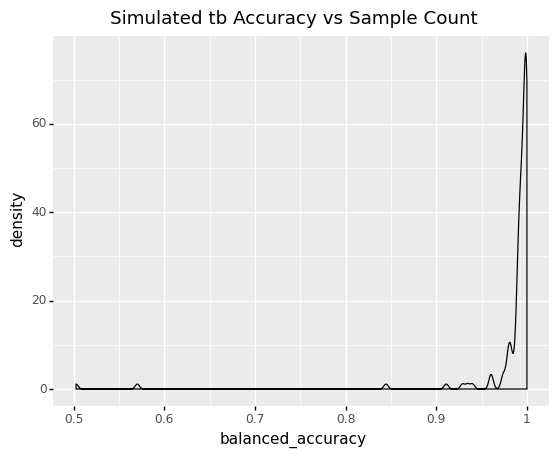

<ggplot: (8761973102057)>

In [12]:
plot = ggplot(tb_metrics[tb_metrics['supervised'] == 'three_layer_net'], aes(x='balanced_accuracy')) 
plot += geom_density()
plot += ggtitle('Simulated tb Accuracy vs Sample Count')
plot

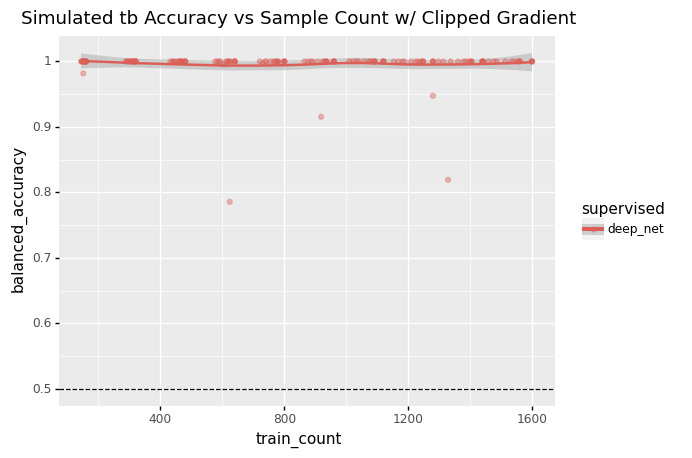

<ggplot: (8761973069285)>

In [13]:
plot = ggplot(tb_metrics[tb_metrics['supervised'] == 'deep_net'], aes(x='train_count', y='balanced_accuracy', color='supervised')) 
plot += geom_smooth()
plot += geom_point(alpha=.4)
plot += geom_hline(yintercept=.5, linetype='dashed')
plot += ggtitle('Simulated tb Accuracy vs Sample Count w/ Clipped Gradient')
plot